In [1]:
import os

# OUR LIBRARIES / FUNCTIONS
from ImageLoader import load_image
from StarDetector import plot_detected_stars, find_stars, save_as_text_file
from StarMatching import estimate_transformation, get_star_matches, plot_matches

In [2]:
directory_path = "Ex1_test_101/"
file_names = os.listdir(directory_path)  # Get the list of files in the directory

file_path_combinations = []
size = len(file_names)
for f1 in file_names:
    for f2 in file_names:
        if f1 == f2:
            continue
        file_path_combinations.append((os.path.join(directory_path, f1),
                                       os.path.join(directory_path, f2)))
print(f"Number of combinations: {len(file_path_combinations)}")

Number of combinations: 12


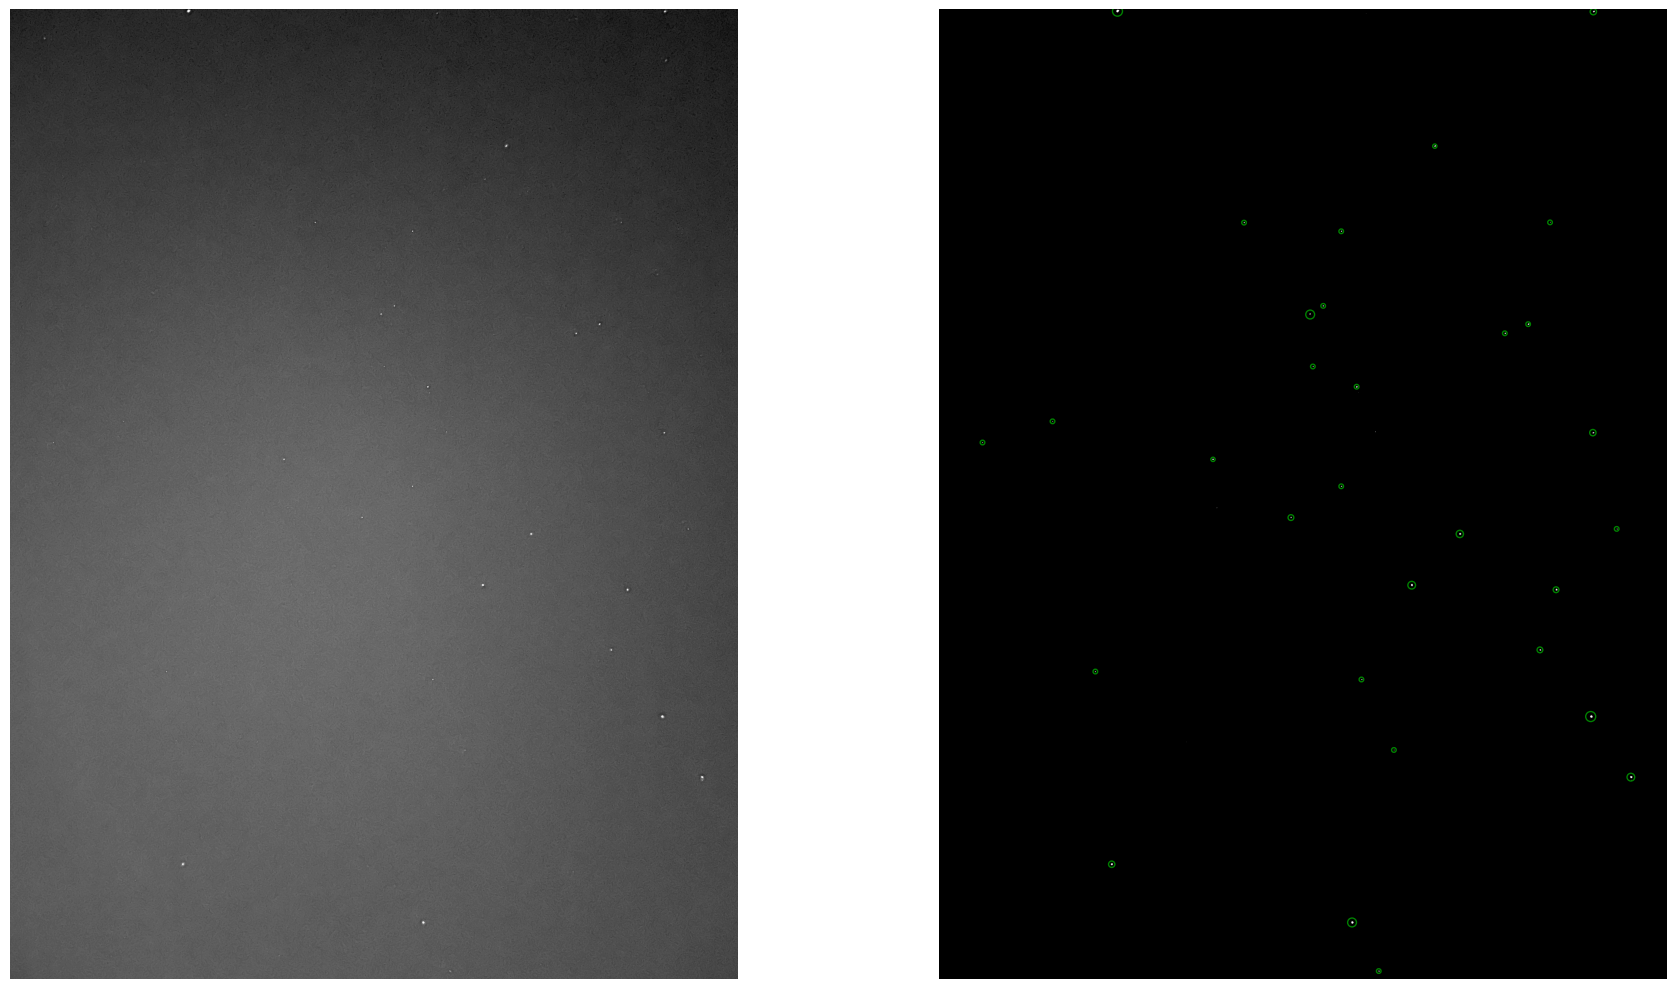

Saved file! location: StarsData/fr1.txt


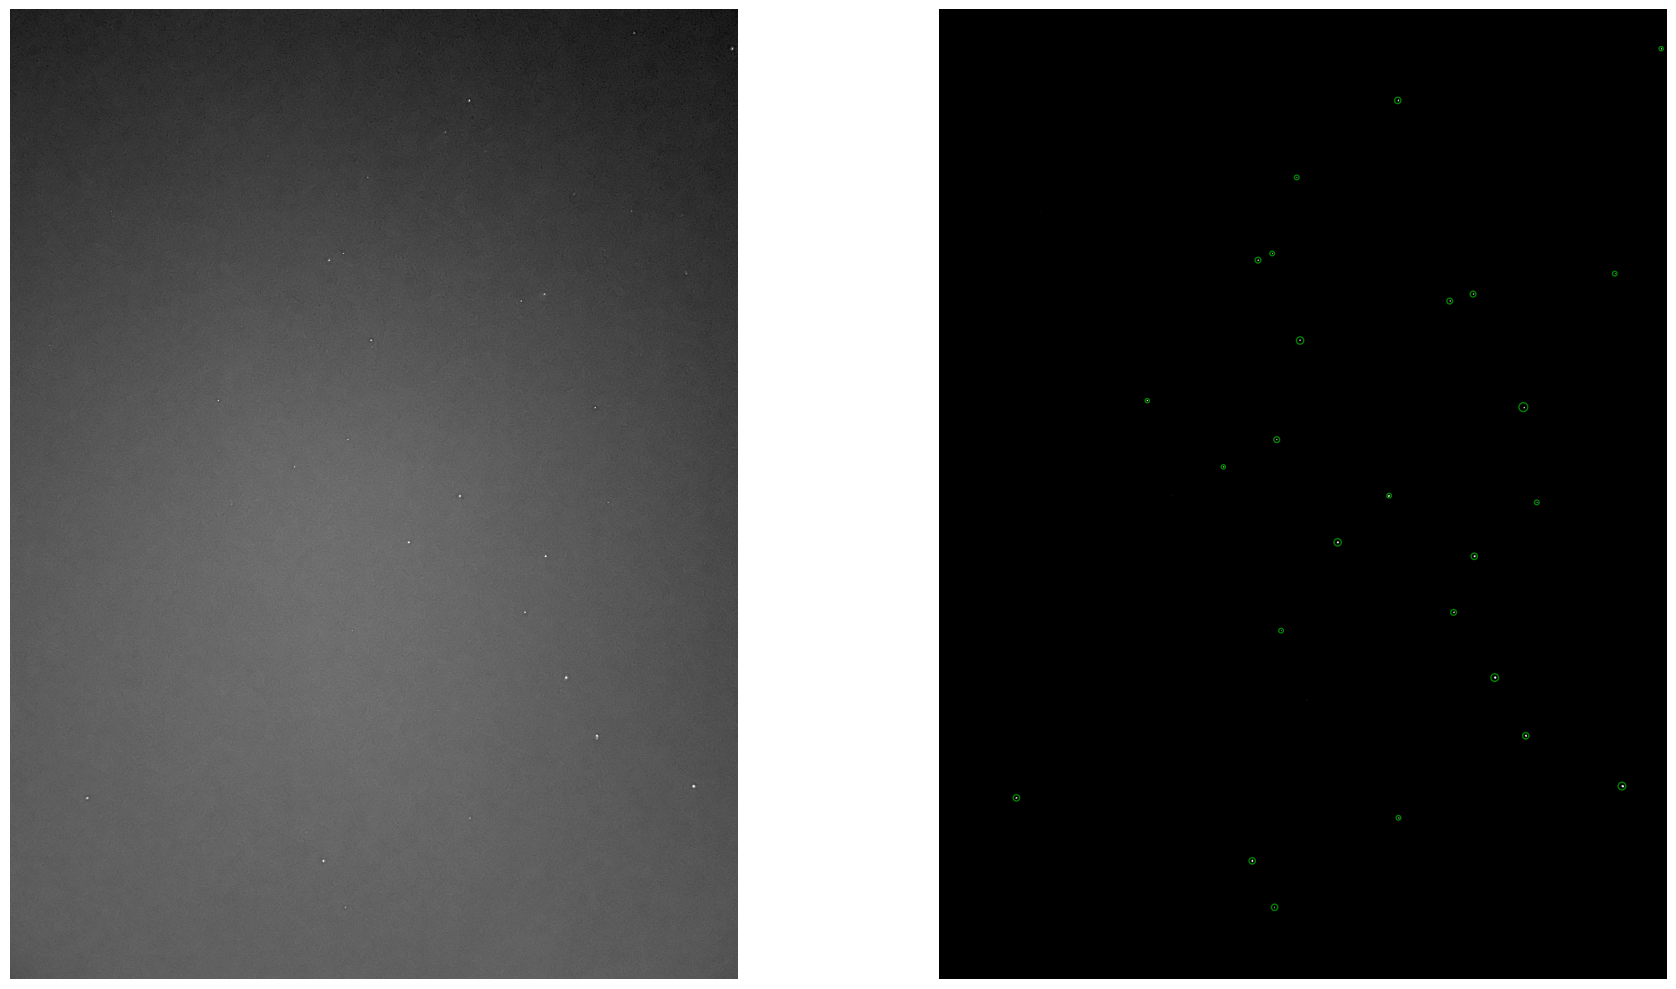

Saved file! location: StarsData/fr2.txt


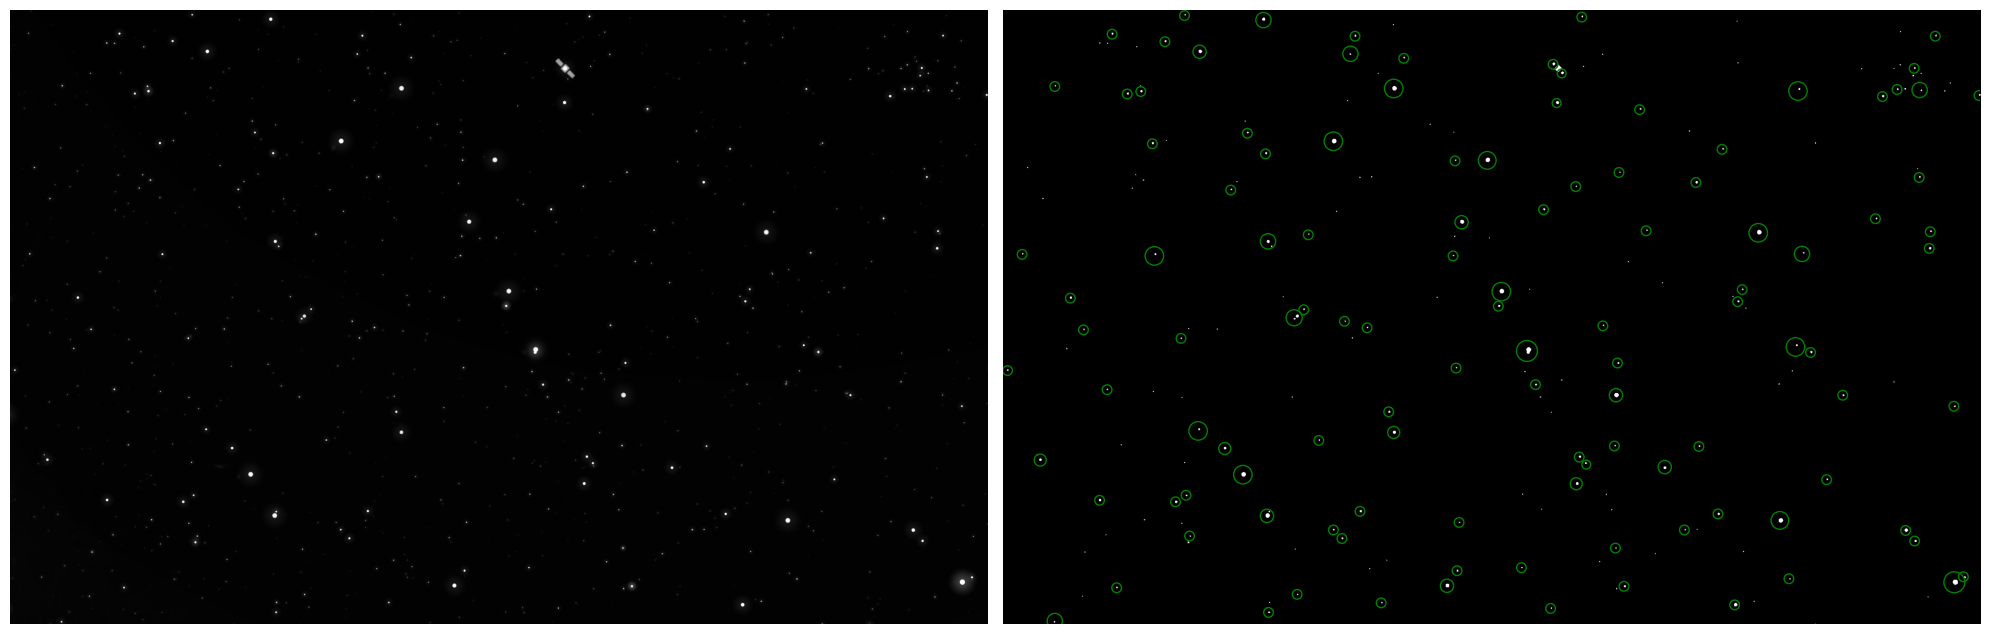

Saved file! location: StarsData/ST_db1.txt


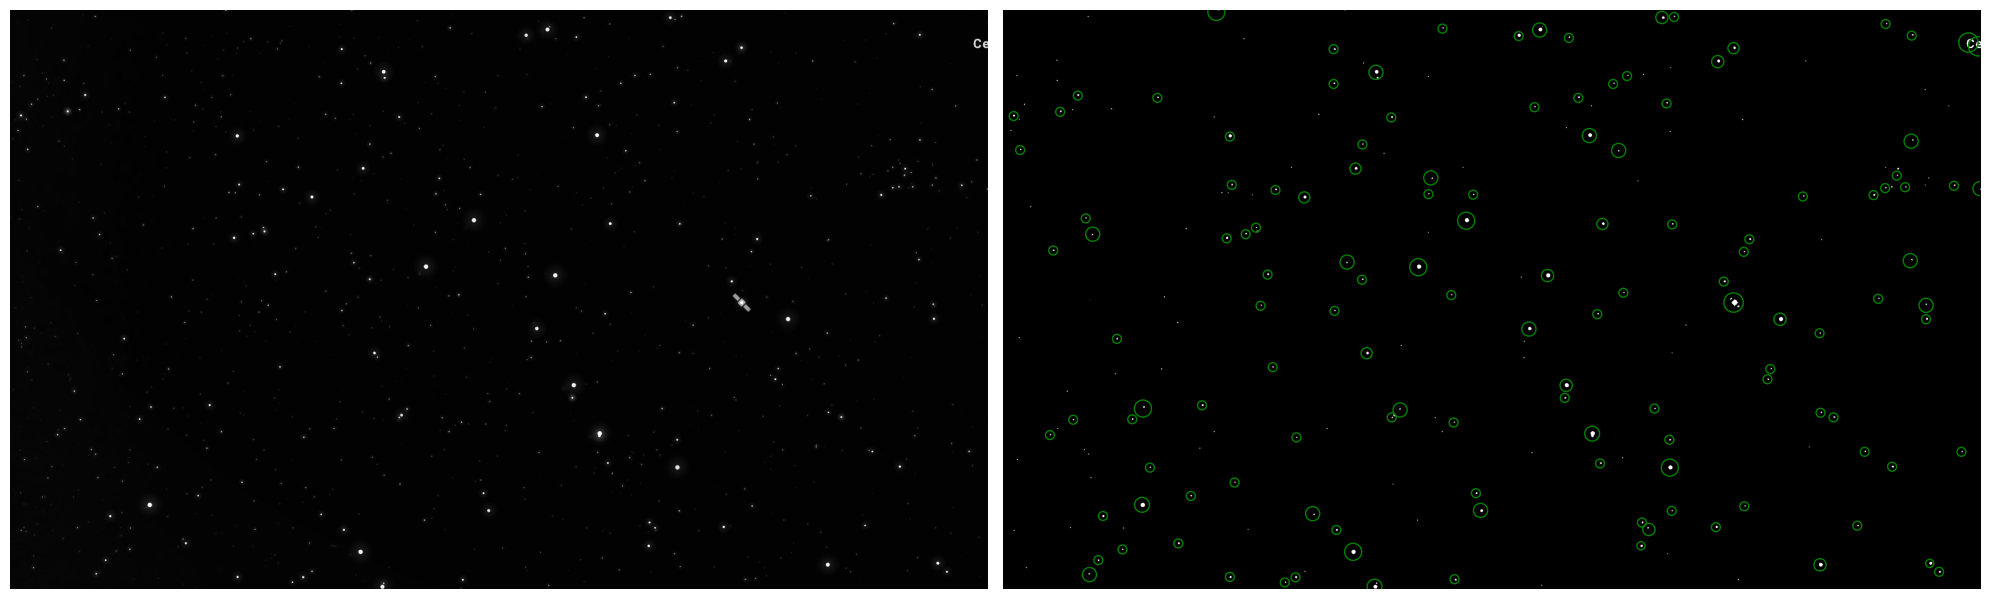

Saved file! location: StarsData/ST_db2.txt


In [3]:
for img_path in file_names:
    img = load_image(os.path.join(directory_path, img_path))
    points, stars_data = find_stars(img)
    plot_detected_stars(img, stars_data)
    save_as_text_file(stars_data, f"StarsData/{img_path.split('/')[-1].split('.')[0]}.txt", verbose=True)

Starting iteration 1.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 31
	Image2 number of feature points found: 26
Computing matches...


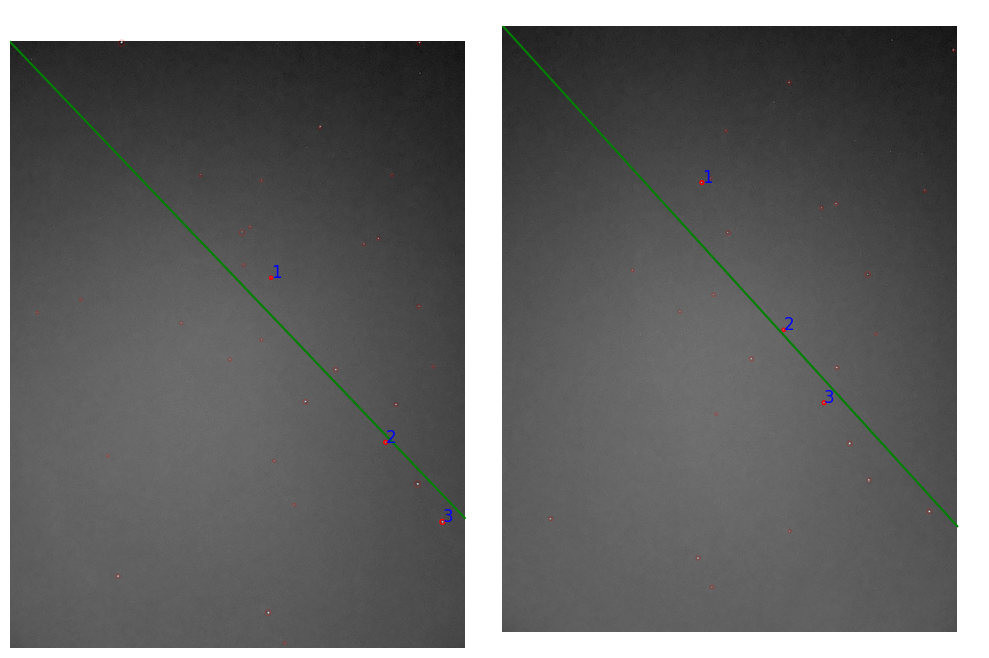

---------------------------------------------------------------------------------------------
Starting iteration 2.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 31
	Image2 number of feature points found: 115
Computing matches...


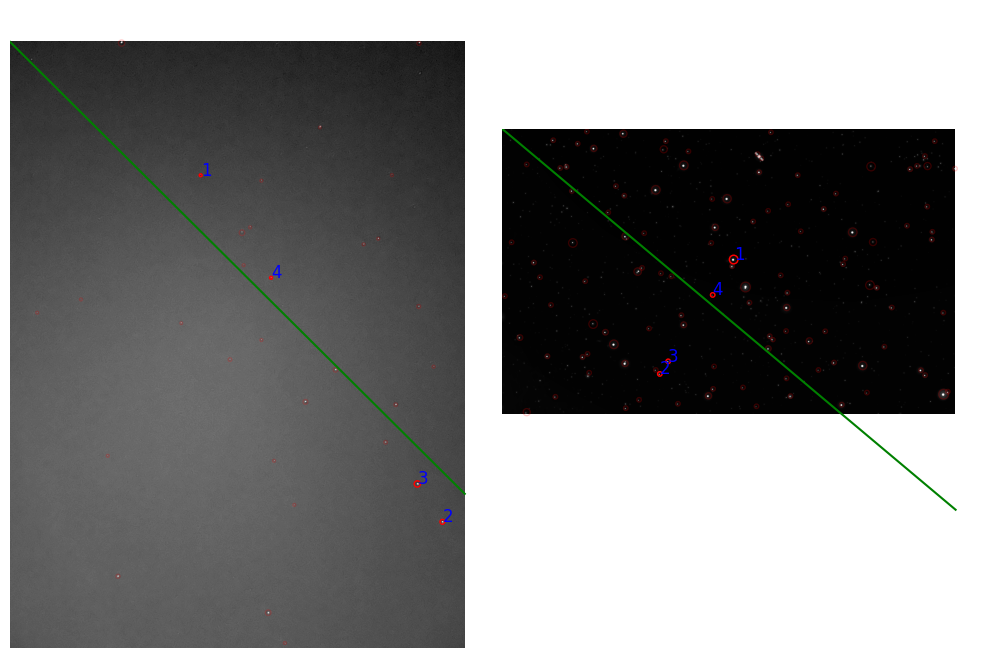

---------------------------------------------------------------------------------------------
Starting iteration 3.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 31
	Image2 number of feature points found: 131
Computing matches...


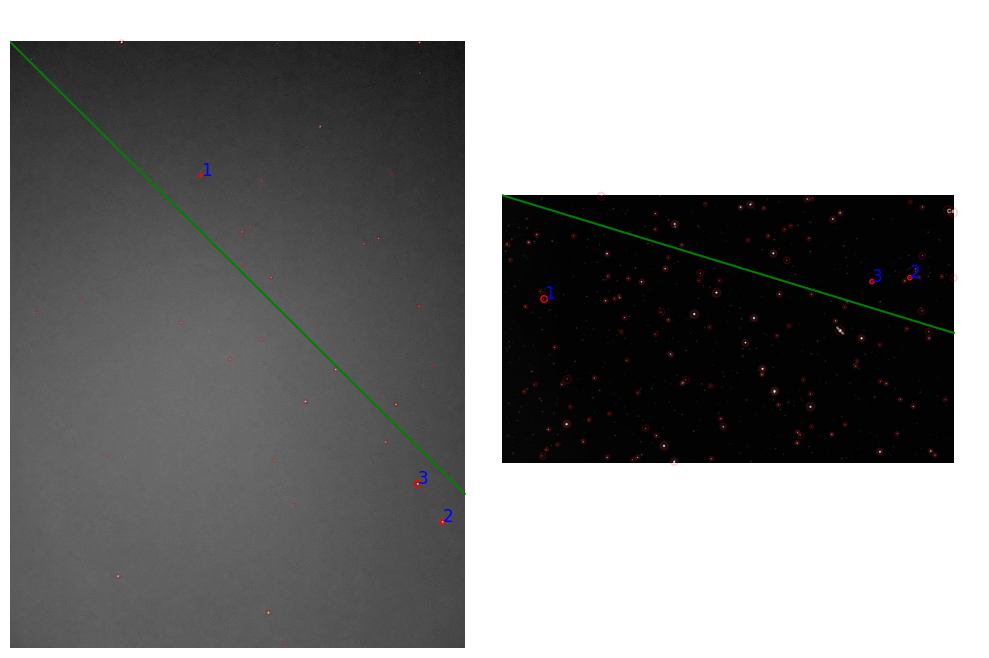

---------------------------------------------------------------------------------------------
Starting iteration 4.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 26
	Image2 number of feature points found: 31
Computing matches...


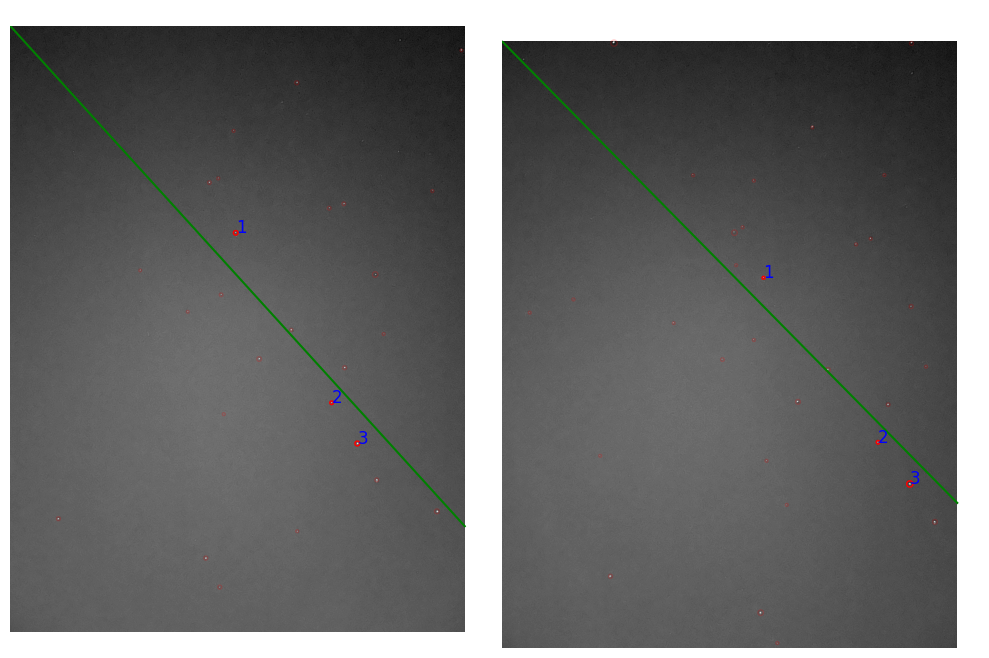

---------------------------------------------------------------------------------------------
Starting iteration 5.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 26
	Image2 number of feature points found: 115
Computing matches...


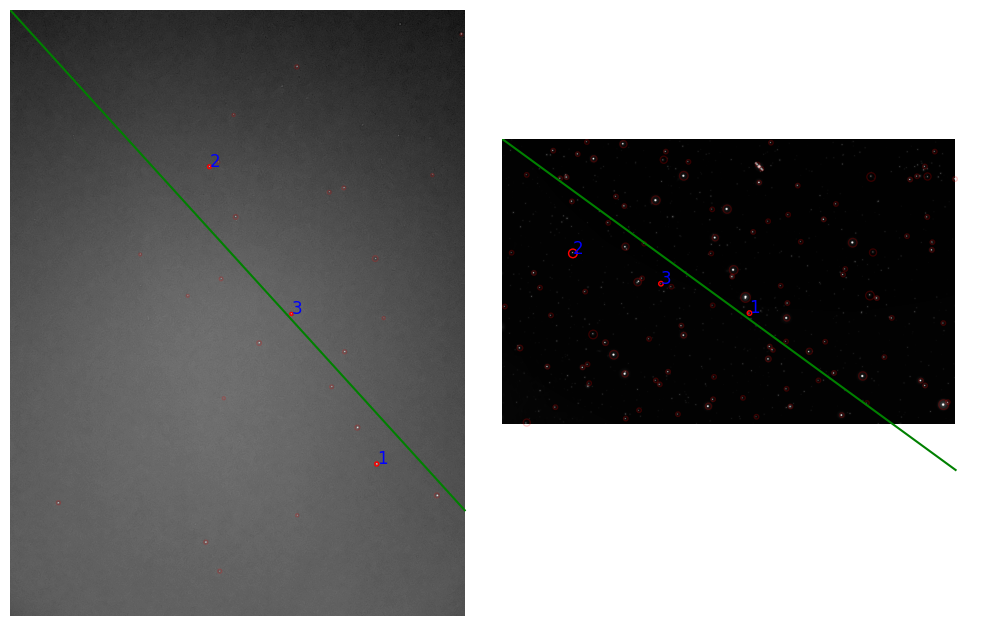

---------------------------------------------------------------------------------------------
Starting iteration 6.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 26
	Image2 number of feature points found: 131
Computing matches...


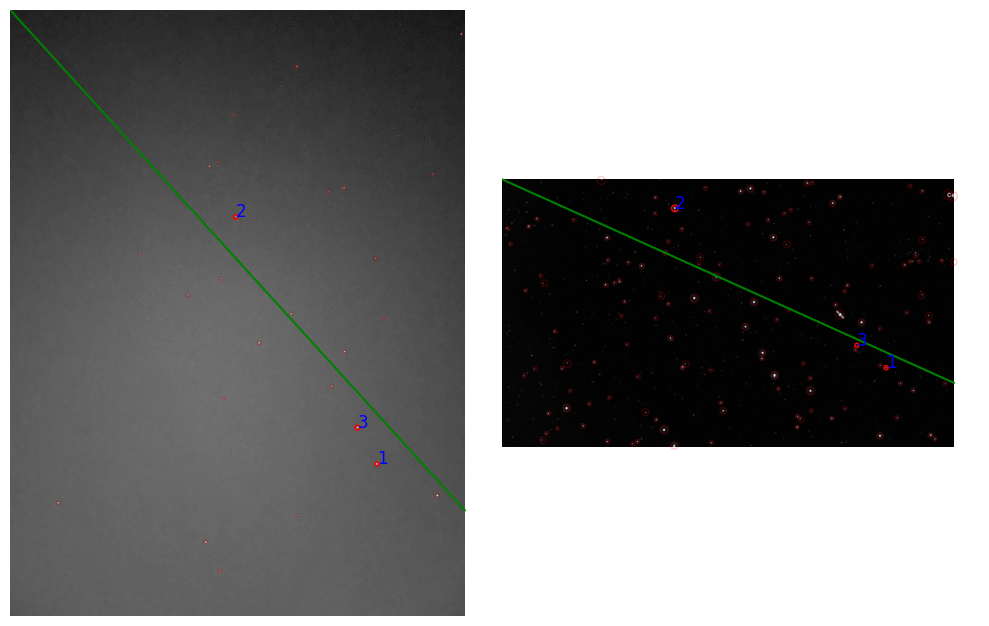

---------------------------------------------------------------------------------------------
Starting iteration 7.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 115
	Image2 number of feature points found: 31
Computing matches...


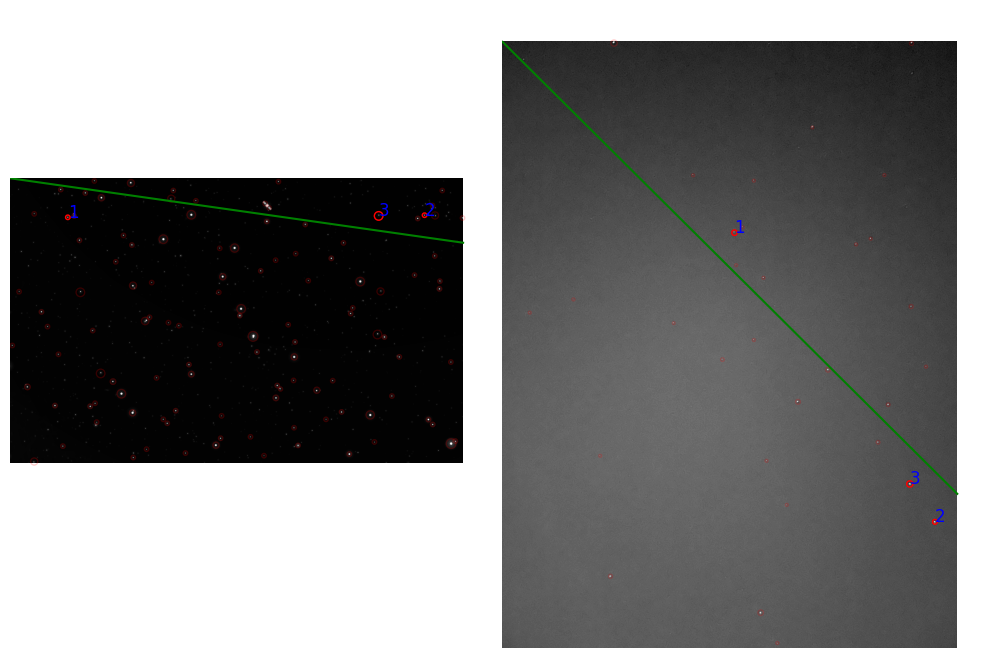

---------------------------------------------------------------------------------------------
Starting iteration 8.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 115
	Image2 number of feature points found: 26
Computing matches...


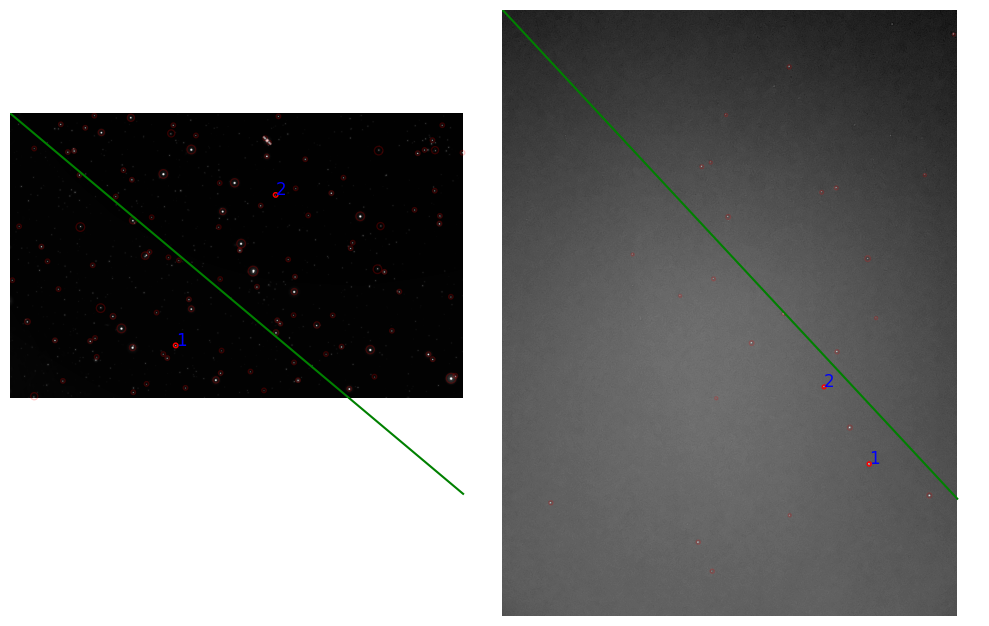

---------------------------------------------------------------------------------------------
Starting iteration 9.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 115
	Image2 number of feature points found: 131
Computing matches...


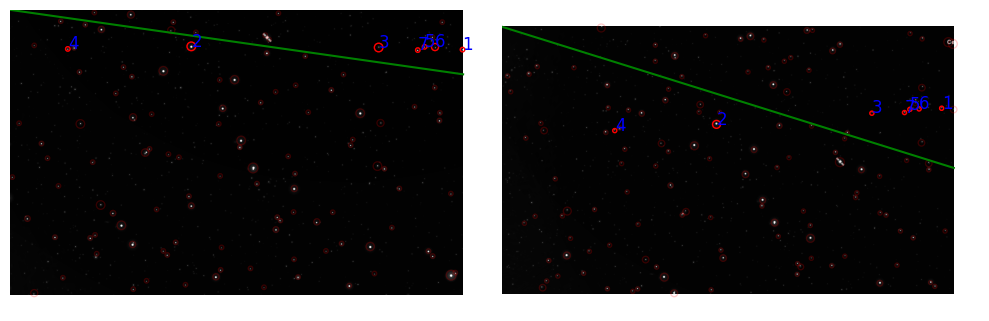

---------------------------------------------------------------------------------------------
Starting iteration 10.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 131
	Image2 number of feature points found: 31
Computing matches...


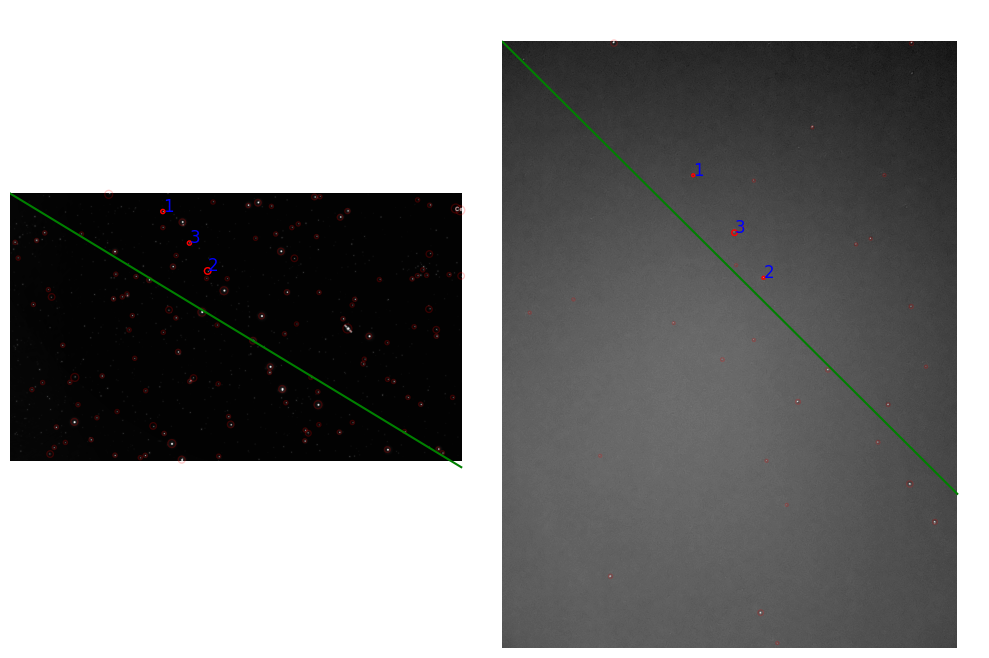

---------------------------------------------------------------------------------------------
Starting iteration 11.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 131
	Image2 number of feature points found: 26
Computing matches...


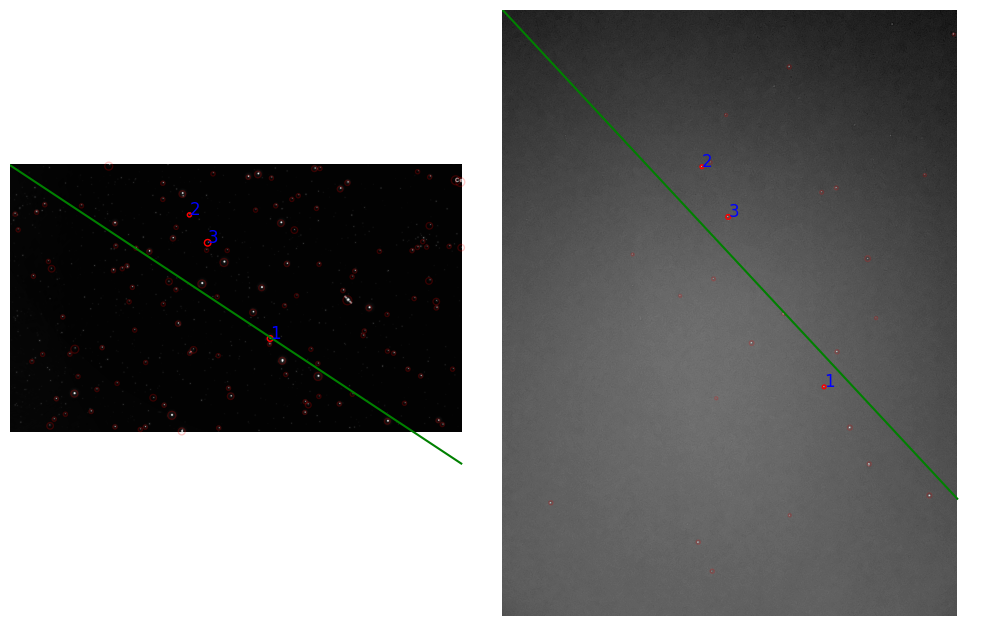

---------------------------------------------------------------------------------------------
Starting iteration 12.....
Loaded images...
Finding feature points...
	Image1 number of feature points found: 131
	Image2 number of feature points found: 115
Computing matches...


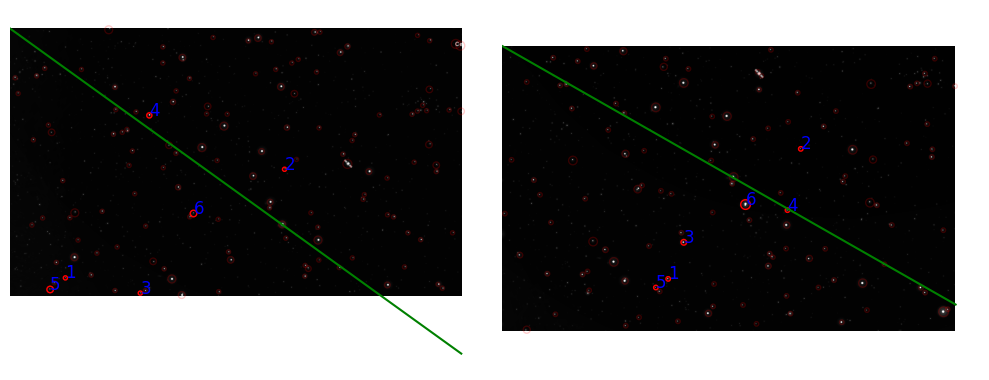

---------------------------------------------------------------------------------------------


In [4]:
for i, (im1_path, im2_path) in enumerate(file_path_combinations, 1):
    print(f"Starting iteration {i}.....")
    ##### Load the images #####
    im1 = load_image(im1_path)
    im2 = load_image(im2_path)

    print("Loaded images...")

    ##### Find feature points in each image #####
    print("Finding feature points...")
    points1, im1_data = find_stars(im1, method='hough')
    points2, im2_data = find_stars(im2, method='hough')
    print(f"\tImage1 number of feature points found: {len(points1)}\n"
          f"\tImage2 number of feature points found: {len(points2)}")

    print("Computing matches...")
    ##### Estimate Affine transformation #####
    model, L1, L2 = estimate_transformation(points1, points2, method='ransac')
    ##### Detect matches using the estimated transformation #####
    matched_points = get_star_matches(model, points1, points2)

    ##### Plot and save results #####
    plot_matches(matched_points, im1, im2, im1_data, im2_data, L1, L2)
    print("---------------------------------------------------------------------------------------------")